In [1]:
import os
import cv2
import slir
import glob
import h5py
import pickle
import numpy as np
import pandas as pd
from bdpy import BData
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics.pairwise import cosine_similarity

np.set_printoptions(suppress=True)

In [2]:
with open("kay_data/kay_brain_responses_roi_list.pickle", "rb") as input_file:
    kay_brain_responses_roi_list = pickle.load(input_file)

In [3]:
with open("kay_data/stimuli_features.pickle", "rb") as input_file:
    stimuli_features = pickle.load(input_file)

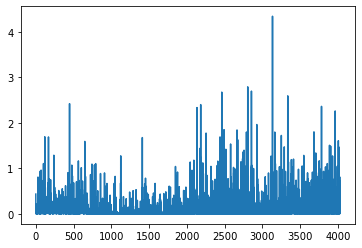

In [4]:
plt.plot(stimuli_features['stimuli_0_color_superes'][1])

In [5]:
x = list()
y = list()

In [6]:
for i, res_roi in tqdm_notebook(enumerate(kay_brain_responses_roi_list)):
    stimuli = stimuli_features['stimuli_{0}_color_superes'.format(i)]
    imagenet_label = stimuli[0][0]
    imagenet_class = stimuli[0][1]
    imagenet_score = stimuli[0][2]
    image_features = stimuli[1]
    
    res = res_roi[0]
    roi = res_roi[1]
    
    x.append(res)
    y.append(image_features)
#     print(i, res_roi)
#     print(imagenet_class, imagenet_label, imagenet_score)
#     print(image_features)
#     print(res, roi)

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [7]:
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((1750, 8428), (1750, 4032))

In [8]:
model = linear_model.LinearRegression(n_jobs=-1)
# model = slir.SparseLinearRegression(verbose=1)

In [9]:
model.fit(x, y)

LinearRegression(n_jobs=-1)

In [10]:
with open("kay_data/LinearRegression_all_voxels.pickle", "wb") as fp:
    pickle.dump(model, fp)

In [11]:
# p = model.predict([x[15]])
p = model.predict(x)

In [12]:
# 1750 * 4032
p.shape, y.shape

((1750, 4032), (1750, 4032))

In [ ]:
p = p.reshape((1750, 4032))
p.shape

In [ ]:
x[15], y[15]

In [ ]:
cosine_similarity(p, y)
# cosine_similarity([pr[15], y[15]])

In [13]:
sim = list()
for i, y_ in tqdm_notebook(enumerate(y)):
    sim.append(cosine_similarity([p[i], y_]))
sum(sim) / len(sim)

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


array([[1.        , 0.99048148],
       [0.99048148, 1.        ]])

### test

In [14]:
x_test = list()
y_test = list()

In [15]:
with open("kay_data/kay_brain_responses_test_roi_list.pickle", "rb") as input_file:
    kay_brain_responses_test_roi_list = pickle.load(input_file)

In [16]:
with open("kay_data/stimuli_test_features.pickle", "rb") as input_file:
    stimuli_test_features = pickle.load(input_file)

In [17]:
for i, res_roi in tqdm_notebook(enumerate(kay_brain_responses_test_roi_list)):
    stimuli = stimuli_test_features['stimuli_test_{0}_color_superes'.format(i)]
    imagenet_label = stimuli[0][0]
    imagenet_class = stimuli[0][1]
    imagenet_score = stimuli[0][2]
    image_features = stimuli[1]
    
    res = res_roi[0]
    roi = res_roi[1]
    
    x_test.append(res)
    y_test.append(image_features)
#     print(i, res_roi)
#     print(imagenet_class, imagenet_label, imagenet_score)
#     print(image_features)
#     print(res, roi)

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [23]:
x = np.array(x)
y = np.array(y)

x_test = np.array(x_test)
y_test = np.array(y_test)
x.shape, y.shape, x_test.shape, y_test.shape

((1750, 8428), (1750, 4032), (120, 8428), (120, 4032))

In [19]:
p = model.predict(x_test)
# ptest = model.predict(x_test)

In [ ]:
p = p.reshape((120, 4032))
p.shape

In [ ]:
x_test[10], y_test[10]

In [ ]:
cosine_similarity([p[0], y_test[10]])
# cosine_similarity([ptestr[10], y_test[10]])

In [20]:
simil_list = list() 
corrcoef_list = list() 

for i, y_ in tqdm_notebook(enumerate(y_test)):
    simil_list.append(cosine_similarity([p[i], y_])[0][1])
    corrcoef_list.append(np.corrcoef(p[i], y_)[0][1])
sum(simil_list) / len(corrcoef_list), sum(corrcoef_list) / len(corrcoef_list)

C:\Users\zkalyuzhner\.conda\envs\neurot\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


(-0.0018173112174446828, 0.008809537023677018)

In [22]:
with open("kay_data/all_voxels_test_responses.pickle", "wb") as fp:
    pickle.dump(p, fp)

In [ ]:
# np.corrcoef(ptestr[10], y_test[10])
np.corrcoef(p[0], y_test[10])

In [ ]:
simil_list = list() 
corrcoef_list = list() 

In [ ]:
# for i, y_ in tqdm_notebook(enumerate(y_test)):
#     p = model.predict([x_test[i]])
#     simil_list.append(cosine_similarity([p[0], y_])[0][1])

for i, y_ in tqdm_notebook(enumerate(y_test)):
    simil_list.append(cosine_similarity([p[0], y_])[0][1])
    corrcoef_list.append(np.corrcoef(p[0], y_)[0][1])

In [ ]:
sum(simil_list) / len(simil_list), sum(corrcoef_list) / len(corrcoef_list)

In [ ]:
# with open("kay_data/slir_predicted_feature_vectors_test.pickle", "wb") as fp:
# # with open("kay_data/kay_brain_responses_test_roi_list.pickle", "wb") as fp:
#     pickle.dump(ptestr, fp)

### model explanation

In [ ]:
import lime
import lime.lime_tabular
import lime.explanation

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(x, mode='regression', )

In [ ]:
i = 25
exp = explainer.explain_instance(x_test[i], model.predict, )

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
model.coef_.shape

In [ ]:
coefficients = pd.concat([pd.DataFrame(x),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

In [ ]:
coefficients

In [ ]:
coefficients.columns[8420:8435]

In [ ]:
# rows: rois, columns: image feature vectors
coefficients.iloc[:, 8428:-1]

In [ ]:
# Finding highest values in each row
model_important_rois = coefficients.apply(lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=len(coefficients.columns))

In [ ]:
model_important_rois

In [ ]:
# rows: rois, columns: image feature vectors
roi_image_coef = model_important_rois.iloc[:, 8428:-1]
roi_image_coef

In [ ]:
# rows: rois, columns: rois

roi_roi_coef = model_important_rois.iloc[:, 0:8428]
roi_roi_coef

In [ ]:
roi_image_coef.stack().hist(bins=6000, figsize=(20, 15))

In [ ]:
roi_roi_coef.stack().hist(bins=8000, figsize=(20, 15))

### train model on first 4000 `responses`

In [ ]:
x[:, :4000].shape

In [ ]:
x4k = x[:, 4000:]
y4k = y
x4k.shape, y4k.shape

In [ ]:
model4k = linear_model.LinearRegression(fit_intercept=False, n_jobs=-1)
model4k.fit(x4k, y4k)

In [ ]:
x4k_test = x_test[:, 4000:]
y4k_test = y_test
x4k_test.shape, y4k_test.shape

In [ ]:
with open("kay_data/LinearRegression_last_4000_voxels.pickle", "wb") as fp:
    pickle.dump(model4k, fp)

In [ ]:
p4k = model4k.predict(x4k)

In [ ]:
sim = list()
for i, y_ in tqdm_notebook(enumerate(y4k)):
    sim.append(cosine_similarity([p4k[i], y_]))
sum(sim) / len(sim)

In [ ]:
p4k = model4k.predict(x4k_test)

sim = list()
for i, y_ in tqdm_notebook(enumerate(y4k_test)):
    sim.append(cosine_similarity([p4k[i], y_]))
sum(sim) / len(sim)

In [ ]:
codf = pd.DataFrame({"Feature":range(0, len(x[0])),"Coefficients":model.coef_[0]})
codf

In [ ]:
train_most_important_rois = list()
test_most_important_rois = list()

for i, xx in tqdm_notebook(enumerate(x)):
    codf = pd.DataFrame({"Feature":range(0, len(xx)),"Coefficients":model.coef_[i]})
    train_most_important_rois += codf.sort_values(by=['Coefficients'], ascending=False)['Feature'].tolist()[:100]

for i, xx in tqdm_notebook(enumerate(x_test)):
    codf = pd.DataFrame({"Feature":range(0, len(xx)),"Coefficients":model.coef_[i]})
    test_most_important_rois += codf.sort_values(by=['Coefficients'], ascending=False)['Feature'].tolist()[:100]

In [ ]:
len(train_most_important_rois), len(set(train_most_important_rois)), \
len(test_most_important_rois), len(set(test_most_important_rois))

In [ ]:
train_most_important_rois_unique = np.array(sorted(set(train_most_important_rois)))
test_most_important_rois_unique = np.array(sorted(set(test_most_important_rois)))
# most_important_rois_unique.min(), most_important_rois_unique.max()

In [ ]:
np.diff(train_most_important_rois_unique), np.diff(test_most_important_rois_unique)

In [ ]:
train_most_important_rois_unique, len(train_most_important_rois_unique), \
test_most_important_rois_unique, len(test_most_important_rois_unique)

In [ ]:
from collections import Counter

train_voxel_counter = Counter(train_most_important_rois).most_common(100)
test_voxel_counter = Counter(test_most_important_rois).most_common(100)

In [ ]:
train_voxel_counter, test_voxel_counter

In [ ]:
train_vox = [item[0] for item in train_voxel_counter]
test_vox = [item[0] for item in test_voxel_counter]

inter_vox = [value for value in train_vox if value in test_vox]
inter_vox, len(inter_vox)

In [ ]:
fname = "kay_images.npz"
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [ ]:
dat.keys()

In [ ]:
roi_voxels = dict()

for i, roi in enumerate(dat['roi_names']):
    idx = np.where(dat["roi"] == i)[0]
#     dat_area = dat["responses"][:, idx]
    inter = list(set(idx) & set(inter_vox))
    roi_voxels[roi] = (inter, len(inter))

In [ ]:
roi_voxels

### train model with coef important features

In [ ]:
xf = x[:, inter_vox]
xf.shape

In [ ]:
modelf = linear_model.LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
modelf.fit(xf, y)

In [ ]:
with open("kay_data/LinearRegression_coef_voxels.pickle", "wb") as fp:
    pickle.dump(modelf, fp)

In [ ]:
p = modelf.predict(xf)

In [ ]:
p.shape, y.shape

In [ ]:
sim = list()
for i, y_ in tqdm_notebook(enumerate(y)):
    sim.append(cosine_similarity([p[i], y_]))
sum(sim) / len(sim)

In [ ]:
xf_test = x_test[:, inter_vox]
xf_test.shape

In [ ]:
p = modelf.predict(xf_test)

In [ ]:
sim = list()
for i, y_ in tqdm_notebook(enumerate(y_test)):
    sim.append(cosine_similarity([p[i], y_]))
sum(sim) / len(sim)